### Preprocessing of categorical data

- useful when feature has outliers
- this method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It alse reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
- makes data more Gaussian-like

In [16]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
def plot(x, bins=10, pl=True):
    
    if pl:
        t = np.linspace(-1, 1, len(x))
        plt.figure(figsize=(15, 3))
        plt.plot(t, x)
    
    qtu = QuantileTransformer(random_state=32, output_distribution='uniform')
    qtn = QuantileTransformer(random_state=32, output_distribution='normal')
    x_u = qtu.fit_transform(x)
    x_n = qtn.fit_transform(x)

    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    ax[0].hist(x, bins=10)
    sns.kdeplot(x_u.flatten(), ax=ax[1])
    sns.kdeplot(x_n.flatten(), ax=ax[2])
    plt.show()

In [28]:
seed = 32
n_cat, n_samples = 8, 100

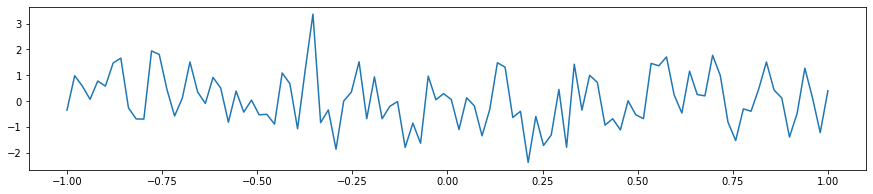

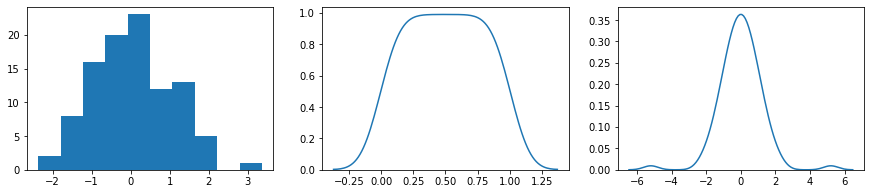

In [30]:
np.random.seed(seed)
x = np.random.randn(n_samples, 1)
plot(x)

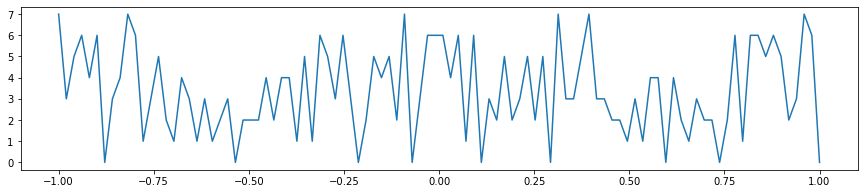

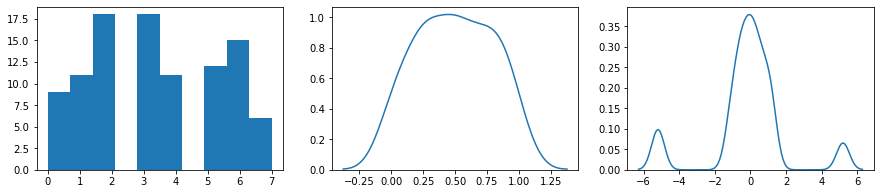

In [26]:
np.random.seed(seed)
x = np.random.randint(n_cat, size=(n_samples, 1))
plot(x)

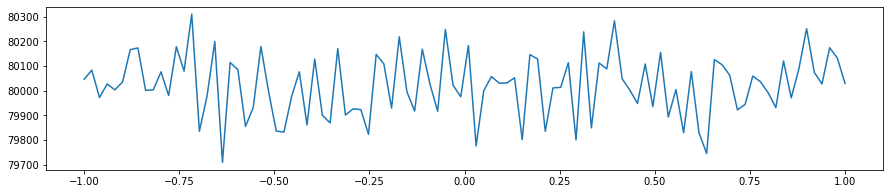

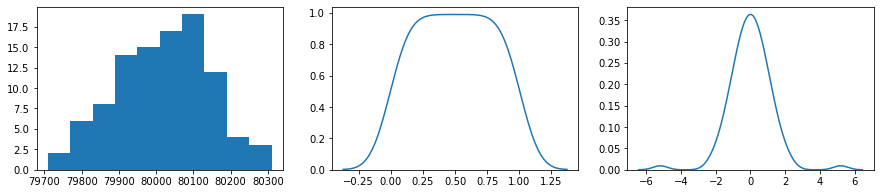

In [20]:
np.random.seed(seed)
x = np.random.binomial(1e+5, p=0.8, size=(n_samples, 1))
plot(x)

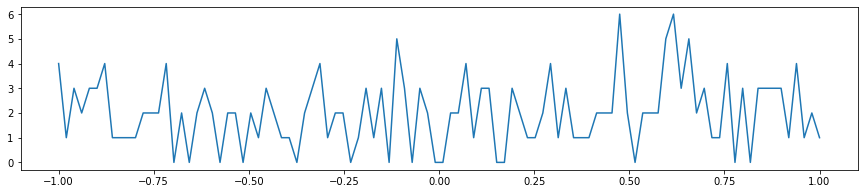

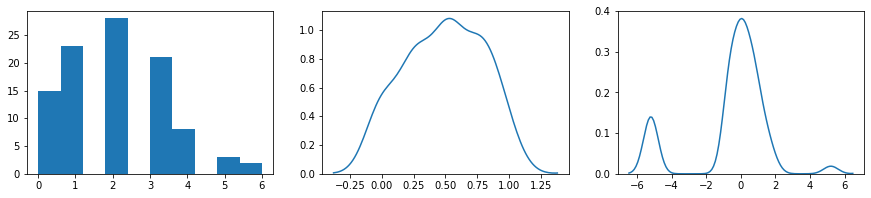

In [21]:
np.random.seed(seed)
x = np.random.poisson(lam=2, size=(n_samples, 1))
plot(x)

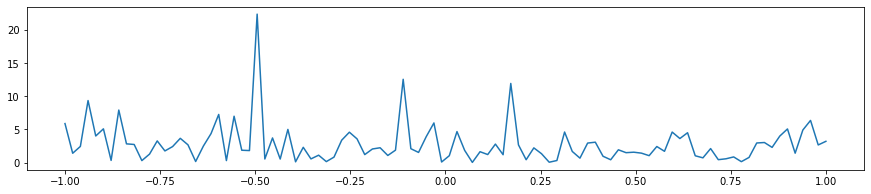

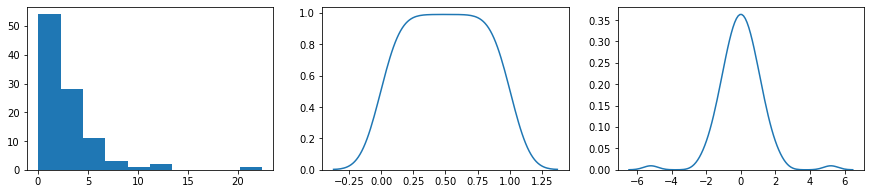

In [22]:
np.random.seed(seed)
x = np.random.exponential(scale=3, size=(n_samples, 1)).reshape(-1, 1)
plot(x, bins=100)

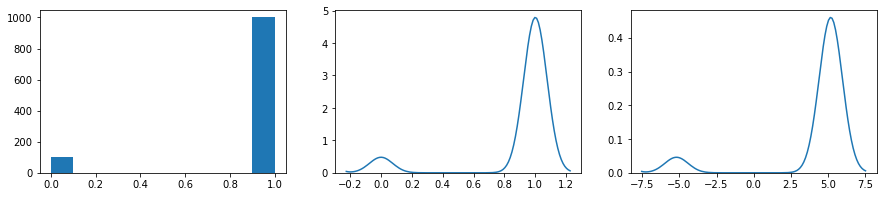

In [25]:
np.random.seed(seed)
x = np.random.permutation(np.array([0]*100 + [1]*1000)).reshape(-1, 1)
plot(x, pl=False)